In [30]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import ensemble
import time

In [11]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [12]:
lfw.keys()

dict_keys(['DESCR', 'images', 'target', 'data', 'target_names'])

In [13]:
lfw.images.shape

(1140, 50, 37)

<Figure size 576x576 with 0 Axes>

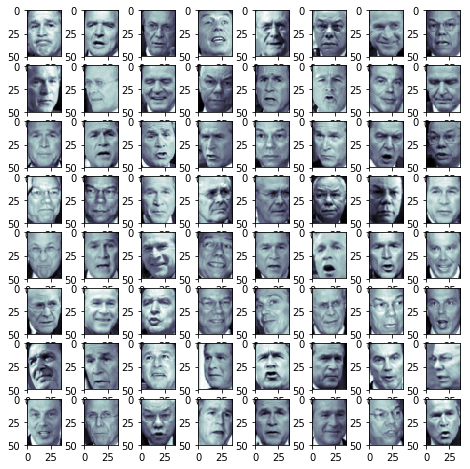

In [7]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [15]:
x ,y = lfw.data,lfw.target
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 0)
pca_oliv = PCA()
pca_oliv.fit(xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
k = 0
total = 0
while total<0.99:
    total = total + pca_oliv.explained_variance_ratio_[k]
    k = k+1
k

316

In [21]:
pca_lfw = PCA(n_components=k,whiten = True)
x_transformed = pca_lfw.fit_transform(xtrain)
transformed.shape

(855, 316)

In [23]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((855,50,37))

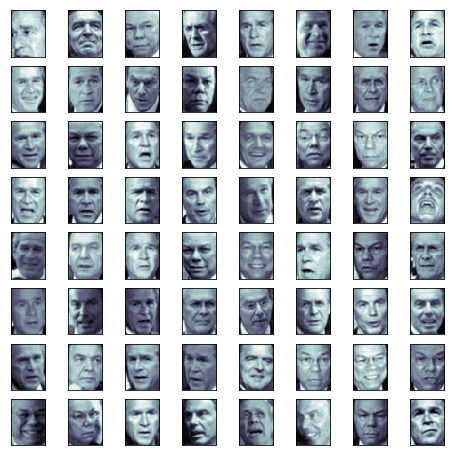

In [24]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(x_approx[i],cmap = plt.cm.bone)
plt.show()
        

In [25]:
pca_lfw.components_.shape

(316, 1850)

In [26]:
eigenv = pca_lfw.components_.reshape(k,50,37)

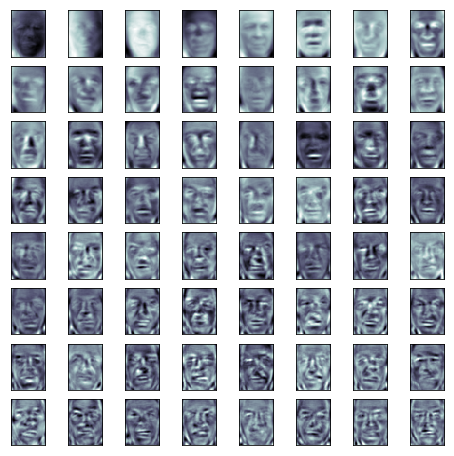

In [27]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(eigenv[i],cmap = plt.cm.bone)
plt.show()

In [28]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(xtest)

In [ ]:
#without pca random forest

In [33]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(xtrain,ytrain)
print(time.time()-start)
ypred = rf.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.1683657169342041
             precision    recall  f1-score   support

          0       0.67      0.72      0.69        61
          1       0.58      0.39      0.47        36
          2       0.65      0.93      0.77       122
          3       0.67      0.06      0.12        31
          4       0.53      0.29      0.37        35

avg / total       0.63      0.64      0.59       285

[[ 44   1  13   0   3]
 [  7  14  12   1   2]
 [  5   3 113   0   1]
 [  6   3  17   2   3]
 [  4   3  18   0  10]]


In [ ]:
#with pca rf

In [36]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca,ytrain)
print(time.time()-start)
ypred = rf.predict(x_test_pca)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.08774828910827637
             precision    recall  f1-score   support

          0       0.44      0.41      0.42        61
          1       0.56      0.14      0.22        36
          2       0.52      0.87      0.65       122
          3       0.11      0.03      0.05        31
          4       0.57      0.11      0.19        35

avg / total       0.47      0.49      0.43       285

[[ 25   2  30   3   1]
 [  6   5  24   0   1]
 [ 11   2 106   3   0]
 [  9   0  20   1   1]
 [  6   0  23   2   4]]
